In [ ]:
!pip install yfinance

Data Collect

---

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [72]:
# Define Ticker
ticker = 'SPY'

# Define History period and interval
period = '3y'
interval='1d'

# Define columns to collect
cols = ['Open', 'Close', 'Volume']

# Get data history, with cols Open, Close and Volume
data = yf.Ticker(ticker).history(period=period, interval=interval, actions=False)[cols]

In [73]:
# Add 'Variation' to dataframe
data['Variation'] = (data['Close'] - data['Open']) / data['Open'] * 100
data


,Open,Close,Volume,Variation
Date,,,,
2020-03-09 00:00:00-04:00,262.440438,261.420441,309417300,-0.388659
2020-03-10 00:00:00-04:00,271.344110,274.947540,276444100,1.327993
2020-03-11 00:00:00-04:00,267.588188,261.544312,255316300,-2.258649
2020-03-12 00:00:00-04:00,244.041925,236.520477,392220700,-3.082031
2020-03-13 00:00:00-04:00,250.800687,256.739685,329566100,2.368015
...,...,...,...,...
2023-03-01 00:00:00-05:00,395.410004,394.739990,99706800,-0.169448
2023-03-02 00:00:00-05:00,392.679993,397.809998,85127800,1.306409
2023-03-03 00:00:00-05:00,399.709991,404.190002,90038300,1.120815


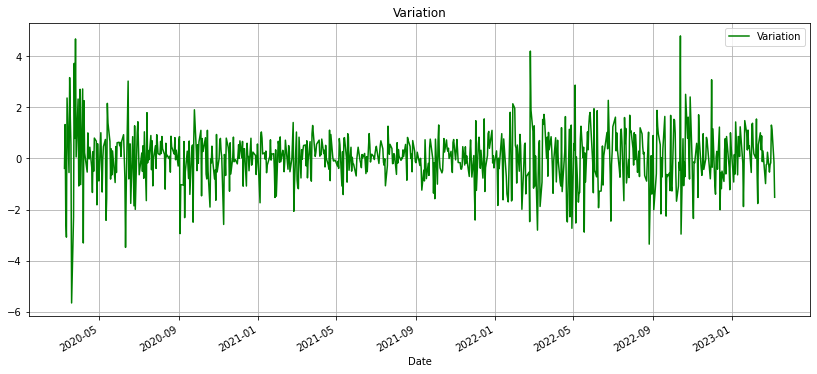

count    755.000000
mean       0.023362
std        1.060105
min       -5.661154
25%       -0.534600
50%        0.080357
75%        0.664180
max        4.799407
Name: Variation, dtype: float64


In [74]:
# Plot chart
#plt.plot(data['Variation'], label='Variation')
#plt.plot()

fig, ax = plt.subplots(figsize=(14, 6))
data[['Variation']].plot(ax=ax, grid=True, c='green')
plt.title("Variation")
plt.show()
print(data['Variation'].describe())


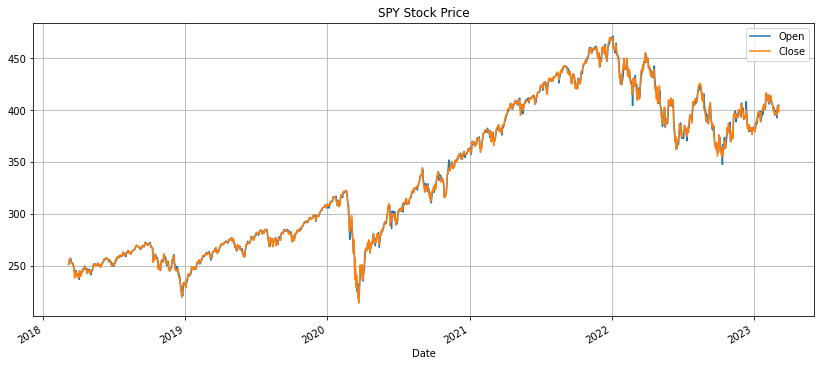

In [65]:
# Plot chart (bis)
fig, ax = plt.subplots(figsize=(14, 6))
data[['Open', 'Close']].plot(ax=ax, grid=True)
plt.title("SPY Stock Price")
plt.show()



NN Model : Linear Regression Model (Sequential)

---

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
from tensorflow.python import feature_column
# Define function to build and compile the model :
def build_model(my_learning_rate):

  # Define NN LR Model Architecture
  model = keras.models.Sequential()
  #keras.layers.Dense(units=1, input_shape=[1]),
  model.add(keras.layers.Dense(units=1, input_shape=(1,)))
  model.add(keras.layers.Dense(units=10, activation='relu'))
  model.add(keras.layers.Dense(units=1))


  # Compile NN Model
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

# Define function to build and compile the model :
def build_model_basic(my_learning_rate):

  # Define NN LR Model Architecture
  model = keras.models.Sequential()
  #keras.layers.Dense(units=1, input_shape=[1]),
  model.add(keras.layers.Dense(units=1, input_shape=(1,)))
  #model.add(keras.layers.Dense(units=10, activation='relu'))
  #model.add(keras.layers.Dense(units=1))


  # Compile NN Model
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

#
# Define function to train model, and monitor train params
def train_model(model, feature, label, epochs, batch_size):
  # Feed feat and label to model, assign to history
  history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)

  # Gather trained model's Weights and bias (W,b)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # List of epochs stored apart
  epochs = history.epoch

  # Gather history (snapshot) of each epoch
  hist = pd.DataFrame(history.history)

  # Gather the model's root mean rmse for each epoch 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

#
print ("Sequential Linear Regression Model : Build model --> OK")
print ("Sequential Linear Regression Model : Train model --> OK")

Sequential Linear Regression Model : Build model --> OK
Sequential Linear Regression Model : Train model --> OK


Monitor Model Training Data (epochs Loss, mse)

---

In [40]:
# Define plot_the_model functions : 
# -- -- Plot feat vs label 
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

# Define plot_the_model functions : 
# -- -- Plot Loss Curve
def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions. --> OK")

Defined the plot_the_model and plot_the_loss_curve functions. --> OK


define data train and test

---

In [23]:
# Define data : feature and label
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

print(my_label)

[5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2]


Initialize HyperParam., Build Model and Train Model

---

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/125
4/4 [==============================] - 0s 4ms/step - loss: 635.7258 - root_mean_squared_error: 25.2136
Epoch 2/125
4/4 [==============================] - 0s 3ms/step - loss: 503.1802 - root_mean_squared_error: 22.4317
Epoch 3/125
4/4 [==============================] - 0s 3ms/step - loss: 422.2185 - root_mean_squared_error: 20.5480
Epoch 4/125
4/4 [==============================] - 0s 3ms/step - loss: 360.9359 - root_mean_squared_error: 18.9983
Epoch 5/125
4/4 [==============================] - 0s 5ms/step - loss: 306.1646 - root_mean_squared_error: 17.4976
Epoch 6

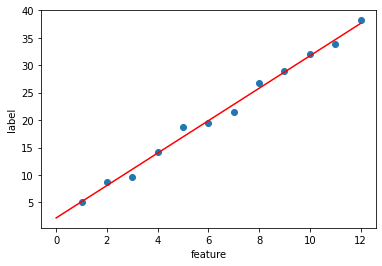

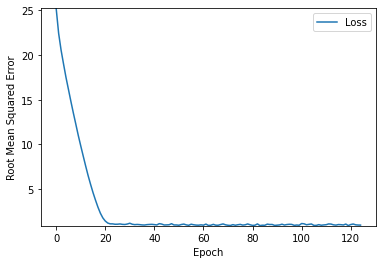

In [42]:
# initialize HyperParametres : learning_rate, epoch, batch_size
learning_rate = 0.05
epochs = 125
my_batch_size = 3

# invoke function build_model
#my_model = build_model(learning_rate) # 3Layers NN
my_model = build_model_basic(learning_rate)
print(my_model.summary())

# invoke train_model and catch trained_weight, trained_bias, epochs, rmse
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

# invoke Plot Function Loss Curve
# blue dots identify the actual data; the red line identifies the output of the trained model
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)





**hyperparameter tuning**
Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.

If the training loss does not converge, train for more epochs.

If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.

If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.

Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.

Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.

For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.